In [126]:
#LDA алгоритам

In [127]:
import matplotlib.pyplot as plt
import numpy as np

In [128]:
#Pravimo skup od 6 vektora sa dve komponente
#Ovaj skup cemo koristiti za obucavanje
# x - dataset

In [129]:
x = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])

In [130]:
X

array([[  74, 1100],
       [  92, 1230],
       [  85, 1300],
       [  94, 1270],
       [  81, 1420],
       [ 102, 1000],
       [ 110,  930],
       [ 120,  800],
       [ 118,  770],
       [ 128,  950]])

In [131]:
#Pravimo vektor y. On definise pripadnost vektora iz skupa x
# 1. ili 2. klasi. Ima 6 komponenata: za svaki pojedincani
#vektor iz skupa x svaka pojedinacna komponenta vektora y
#odredjuje pripadnost 1. ili 2. klasi
#Ovde cemo da postavimo da prva tri vektora iz x pripadaju 1. ,
#a druga tri 2. klasi.

In [132]:
y = np.array([1,1,1,1,1,2,2,2,2,2])

In [133]:
#Sada cemo da iscrtamo polozaje ,,vrhova`` vektora u koord. ravni

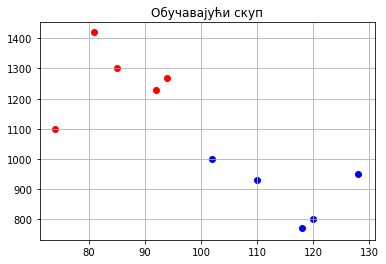

In [134]:
#Da bismo iscrtali polozaje vektora koristimo plt.scatter
#Posto on radi tako da je 1. arg. niz x-koordinata
#a 2. arg. niz y-koordinata tada:
#x[:,0] - vraca samo prvu koordinatu tj. prvu komponentu
#[:,1] - vraca drugu komponentu
plt.scatter(X[:5,0],X[:5,1], c=u'r')
plt.scatter(X[5:,0],X[5:,1], c=u'b')
plt.title("Обучавајући скуп")
plt.grid()
plt.show()

In [135]:
#Na primer ako sacinimo skup sa trokomponentnim vektorima:
xx=np.array([[1,2,3],[1,2,3],[1,2,3]])

In [136]:
#Za ispis samo prvih komponenti:
print(xx[:,0])
#Za ispis samo drugih komponenti:
print(xx[:,1])
#Za ispis samo trecih komponenti:
print(xx[:,2])

[1 1 1]
[2 2 2]
[3 3 3]


In [137]:
#Сада треба да уз помоћ LDA алгоритма извршимо машинско обучавање
#уз помоћ скупа за обучавање
#Зато увозимо следећу библиотеку:
import sklearn.discriminant_analysis as sda

In [138]:
#Променљива klasifikator постаје LDA класификатор (објекат) 
klasifikator = sda.LinearDiscriminantAnalysis()

In [139]:
type(klasifikator)

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [140]:
#Сада треба да обучимо класификатор klasifikator подацима из 
#обучавајућег скупа:
klasifikator.fit(X,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [141]:
#x нам је у суштини матрица
X.shape

(10, 2)

In [142]:
# а y низ
X.shape

(10, 2)

In [171]:
#Сада треба да тестирамо наш класификатор при чему смо подесили
#да у обучавајућем скупу важи 1. класа -> komponenta1,2<0
#2. класа -> komponenta1,2>0
#Правимо низ x_test у који смештамо векторе за класификацију
# а у klas смештамо класе у које је klasifikator разместио
#векторе из x_test

x_test=np.array([[-4,-4],[5,5],[-2,-6],[3,7],[-4,7],[4,-7],[0,0],[-3,6]])
klasifikator.predict(x_test)

array([ 1.,  2.,  1.,  2.,  2.,  1.,  1.,  2.])

In [173]:
x_test[0]

array([-4, -4])

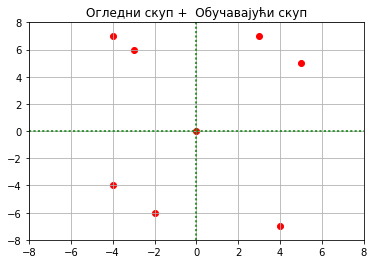

In [174]:
plt.scatter(x_test[:,0],x_test[:,1],c=u"r")
plt.scatter(X[:,0],X[:,1],c=u"b")
plt.scatter
plt.title("Огледни скуп +  Обучавајући скуп")
plt.axvline(x=0, color='g', linestyle='dotted')
plt.axhline(y=0, color='g', linestyle='dotted')
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.grid()
plt.show()

In [147]:
#Класификација 2 класе са мултиваријационом нормалном расподелом

In [148]:
#Cilj nam je isti kao i u  prethodnom slucaju
#Zelimo da nasumicno generisemo dva skupa tacaka
#koncetrisanih u 1. i 3. kvadrantu
#Za 1. kvadrant biramo da srediste rasturanja bude u tacki mean1=[0,0] (2D raspodela!)
# a za 3. kvadrant da to bude tacka mean2=[2,2]

In [149]:
#Definisanje 1. klase

In [150]:
#Da bismo definisali 2D normalnu raspodelu treba da definisemo odgovarajuce parametre
mean1 = [0,0] #multivarijantna srednja vrednost --> srednja vrednost 1D Normalne raspodele
cov1 = [[1,-0.5],[-0.5,1]] # kovarijansa (2D odstupanje) -->standardno odstupanje 1D Norm. rasp.
# kovarijansa je ovde matrica koja mora da bude simetricna i pozitivna-semidefinitna???
#Zato, nasumicno generisanu 2D raspodelu smestamo u x1 i y1 jer je 2D i potom je transponujemo:
broj_uzoraka1 = 500
broj_uzoraka2 = 100
#Sada deifinisemo obucavajuci 2D skup x1,y1
#i potom ogledni skup x1_ogl,y1_ogl
x1_obuc,y1_obuc = np.random.multivariate_normal(mean1,cov1,broj_uzoraka1).T
x1_ogl,y1_ogl = np.random.multivariate_normal(mean1,cov1,broj_uzoraka2).T

In [151]:
#deifnisanje 2. klase
mean2=[2,2] #koordinate sredista rasturanja
cov2=[[1,-0.8],[-0.8,1]] #standardno odstupanje
x2_obuc,y2_obuc = np.random.multivariate_normal(mean2,cov2,broj_uzoraka1).T
x2_ogl,y2_ogl = np.random.multivariate_normal(mean2,cov2,broj_uzoraka2).T

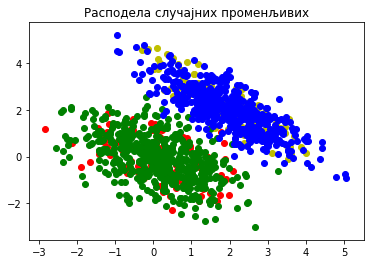

In [152]:
plt.title("Расподела случајних променљивих")
plt.scatter(x1_ogl,y1_ogl,c=u"r")#ogledni skup kl. 1.
plt.scatter(x2_ogl,y2_ogl,c=u"y")#ogledni skup kl. 2.
plt.scatter(x1_obuc,y1_obuc,c=u"g")#obucavajuci skup kl. 1.
plt.scatter(x2_obuc,y2_obuc,c=u"b")#obucavajuci skup kl. 2.
#line, = plt.plot([1, 2, 1], label='Inline label')
#plt.legend()
plt.show()

In [153]:
#Sada imamo definisane 2 klase i to po jednu klasu sa 500 elemenata za obucavanje i po jednu klasu sa 100 
#elemenata za testiranje (unutar svake od ovih dveju klasa).
#Naredbom klasifikator.fit(x,y) kazujemo klasifikatoru klasifikator da na osnovu ulaznih parametara
#iz x izvrsi predvidjanje pripadnosti odredjenoj klasi i da predvidjanje upise u y.
#Dakle mi treba da ove dve klase spojimo u jednu veliku matricu, odredimo joj velicinu tj.
#broj uzoraka koje treba predvideti i na osnovu toga odredimo velicinu vektora y.

In [154]:
#Prvo treba da obucimo nas klasifikator klasifikator. Stoga
# spajamo nasumicno generisane vrednosti iz x1 i y1.
#Posto su u pitanju 2D raspodele prvo vodoravno spajamo 
#x1_obuc iz klase 1 i x2_obuc iz klase 2 (x-koordinata).
#Potom isto radimo za y1 i y2. 
#Konacno X i Y spajamo uspravno u XX_obuc.
#Naredba np.hstack vodoravno spaja dve matrice u jednu.
#Naredba np.hstack spaja uspravno dve matrice u jednu.

X_obuc = np.hstack([x1_obuc,x2_obuc]) 
Y_obuc = np.hstack([y1_obuc,y2_obuc])
XX_obuc = np.vstack([X_obuc,Y_obuc]).T

#Na kraju sve transponujemo (verovatno zbog definicije samog klasifikatora klasifikator)

In [155]:
#Isto cinimo i za nas test skup XX_ogl

In [156]:
X_ogl = np.hstack([x1_ogl,x2_ogl]) 
Y_ogl = np.hstack([y1_ogl,y2_ogl])
XX_ogl = np.vstack([X_ogl,Y_ogl]).T

In [157]:
#Sada cemo ponovo da iscrtamo nase promenljive

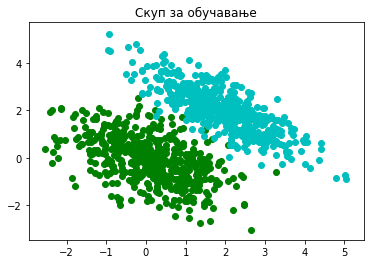

In [158]:
#MATRICA KOLONA: [a11 a12 a13]

#MATRICA VRSTA: | a11 |
#               | a21 |
#               | a31 |

plt.scatter(XX_obuc[0:500,0],XX_obuc[0:500,1],c=u'g')
#Za x koordinate uzmi elemente od 0 do 500 iz prve kolone [x1_obuc]
#Za y koordinate uzmi elemente od 0 do 500 iz druge kolone [y1_obuc]

plt.scatter(XX_obuc[500:1000,0],XX_obuc[500:1000,1],c=u'c')
#Za x koordinate uzmi elemente od 500 do 1000 iz prve kolone [x2_obuc]
#Za y koordinate uzmi elemente od 0 do 500 iz druge kolone [y2_obuc]

plt.title("Скуп за обучавање")
plt.show()

In [159]:
#Na isti nacin mozemo da iscrtamo nas skup za ogled (testiranje)

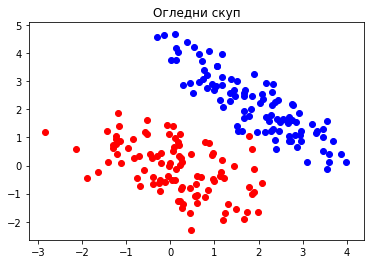

In [160]:
plt.scatter(XX_ogl[0:100,0],XX_ogl[0:100,1],c=u'r') #x1_ogl
plt.scatter(XX_ogl[100:200,0],XX_ogl[100:200,1],c=u'b') #x2_ogl
plt.title("Огледни скуп")
plt.show()

In [161]:
#Definisemo niz od 500 jedinica i 500 dvojki kojim obucavamo klasifikator klasifikator
y_obucavanje = np.ones(1000)
y_obucavanje[500:] = 2 

In [162]:
#Obucavamo klasifikator klasifikator
klasifikator.fit(XX_obuc,y_obucavanje)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

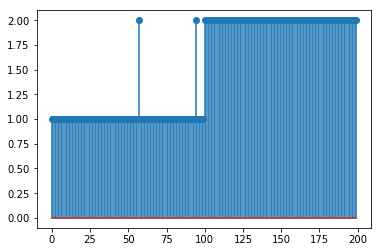

In [163]:
#I zatim vrsimo predvidjanje
y_predvidjanje = np.zeros(200)
y_predvidjanje = klasifikator.predict(XX_ogl)
plt.stem(y_predvidjanje)
plt.show()
#Vidimo da je klasifikator kalsifikator napravio greske prilikom predivdjanja.

In [164]:
y_obucavanje_ogl = np.ones(200)
y_obucavanje_ogl[100:] = 2

#Stoga sracujnamo tacnost:
print("Тачност класификатора klasifikator је: ",(sum(y_obucavanje_ogl == y_predvidjanje)/len(y_predvidjanje))*100, "%")

Тачност класификатора klasifikator је:  99.0 %


In [165]:
w = klasifikator.coef_[0] #[0] dodajemo kako bi w bio broj a ne matrica

In [166]:
k =  -w[0] /w[1] #racunamo koeficijent pravca prace iz parametra .coef -Im/Re = tg(x) = k

In [167]:
xx = np.linspace(-5,5) #definisemo x-osu za liniju razgranicenja

In [168]:
yy = k* xx - (klasifikator.intercept_[0])/w[1] #y = k*x + n

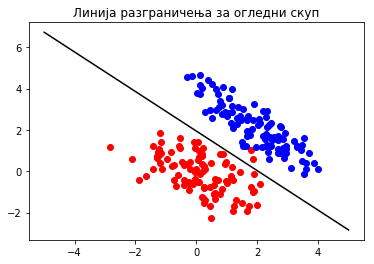

In [169]:
plt.plot(xx,yy, 'k')
plt.scatter(XX_ogl[0:100,0],XX_ogl[0:100,1],c=u'r') #x1_ogl
plt.scatter(XX_ogl[100:200,0],XX_ogl[100:200,1],c=u'b') #x2_ogl
plt.title("Линија разграничења за огледни скуп")
plt.show()